In [16]:
from math import cos, pi, sin
import matplotlib.pyplot as plt
import numpy as np
import random

In [17]:
def J(t, m, x):
    return (1/pi) * cos(m*t - x*sin(t))

In [18]:
def Simpson(J, a, b, m, x):
    return ((b - a)/6)*(J(a, m, x) + 4*J((a+b)/2, m, x) + J(b, m, x))

In [19]:
def simpson(J, a, b, m, x, epsilon, n_0 = 2):
    result_prev = 0

    while True:
        step = (b - a) / n_0
        result = 0

        for i in range(n_0):
            start = a + i * step
            end = a + (i + 1) * step

            result += Simpson(J, start, end, m, x)

        if abs(result_prev - result) < epsilon:
            return result
        else:
            result_prev = result
            n_0 *= 2

In [20]:
a = 0
y0_integrated = []
y1_integrated = []
b = pi
x0 = np.linspace(0, 2*pi, 3 * 10**5)
x1 = np.linspace(0, 2*pi, 3 * 10**5)
maxn0 = 0
for x_k in x0:
    result, n_0 = simpson(J, a, b, 0, x_k, 1e-10, n_0 = 2)
    y0_integrated.append(result)
    if maxn0 < n_0:
        maxn0 = n_0
maxn1 = 0
for x_k in x1:
    result, n_0 = simpson(J, a, b, 0, x_k, 1e-10, n_0 = 2)
    y1_integrated.append(result)
    if maxn1 < n_0:
        maxn1 = n_0
y0_integrated = np.array(y0_integrated)
y1_integrated = np.array(y1_integrated)

TypeError: cannot unpack non-iterable float object

In [21]:
print(maxn0)

0


In [22]:
print(maxn1)

NameError: name 'maxn1' is not defined

In [23]:
def derivative(x2, x0, y2, y0):
    return (y2 - y0) / (x2 - x0)

In [24]:
y0_derivated = []
for i in range(1, len(x0) - 1):
    y0_derivated.append(derivative(x0[i+1], x0[i-1], y0_integrated[i+1], y0_integrated[i-1]))

y1_integrated1 = y1_integrated[1:-1]
print(len(y0_derivated))
print(len(y1_integrated1))

IndexError: list index out of range

In [25]:
res = y0_derivated + y1_integrated1
rasn = max((result-0) for result in res)
plt.plot(res)
print (rasn)

NameError: name 'y1_integrated1' is not defined

In [26]:
def simpson_for_points(J, a, b, m, x, n_0):
    result_prev = 0

    step = (b - a) / n_0
    result = 0

    for i in range(n_0):
        start = a + i * step
        end = a + (i + 1) * step

        result += Simpson(J, start, end, m, x)
        
    return result
            

In [27]:
x0 = np.linspace(0, 2*pi, 300000)

In [28]:
y0_integrate = [simpson_for_points(J, 0, 2*pi, 0 , x_k, 2) for x_k in x0]
y1_integrate = [simpson_for_points(J, 0, 2*pi, 1 , x_k, 2) for x_k in x0]

In [29]:
y0_derivate = []
for i in range(1, len(x0) - 1):
    y0_derivate.append(derivative(x0[i+1], x0[i-1], y0_integrate[i+1], y0_integrate[i-1]))

y1_integrate1 = y1_integrate[1:-1]
print(len(y0_derivate))
print(len(y1_integrate1))

299998
299998


299998
1.0315481802081194e-10


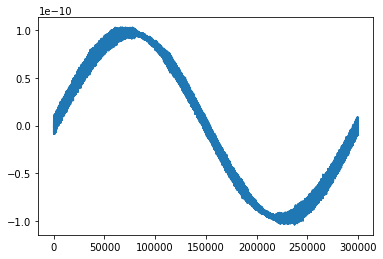

In [30]:
res = np.array(y0_derivate) + np.array(y1_integrate1)
rasn = max((result-0) for result in res)
print(len(res))
plt.plot(res)
print (rasn)

In [31]:
def func(x):
    return 1/(1 + x*x)

In [32]:
def Simpson(f, a, b):
    return ((b - a)/6)*(f(a) + 4*f((a+b)/2) + f(b))

In [33]:
def simpson_for_points(f,a, b, n_0):
    result_prev = 0

    step = (b - a) / n_0
    result = 0

    for i in range(n_0):
        start = a + i * step
        end = a + (i + 1) * step

        result += Simpson(f,start,end)
        
    return result

In [98]:
t = []

In [99]:
t.append(simpson_for_points(func,-1, 1, 2))

In [100]:
t.append(simpson_for_points(func,-1, 1, 4))

In [101]:
t.append(simpson_for_points(func,-1, 1, 8))

In [102]:
t.append(simpson_for_points(func,-1, 1, 16))

In [103]:
t.append(simpson_for_points(func,-1, 1, 32))

In [104]:
t.append(simpson_for_points(func,-1, 1, 64))

In [105]:
t.append(simpson_for_points(func,-1, 1, 128))

In [106]:
t.append(simpson_for_points(func,-1, 1, 256))

In [107]:
p = [2,4,8,16,32,64, 128, 256]

(-1e-06, 1e-06)

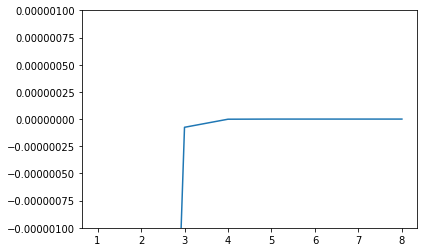

In [108]:
plt.plot(np.log2(p), np.array(t) - pi/2)
plt.ylim(-1e-6, +1e-6)

In [109]:
print(np.array(t) - pi/2)

[-4.12966013e-03 -1.20130694e-05 -7.55655432e-08 -1.18248544e-09
 -1.84783300e-11 -2.89102076e-13 -3.99680289e-15 -8.88178420e-16]


In [110]:
t = np.array(t) - pi/2

In [120]:
import numpy

In [ ]:
#процесс эйткена

In [125]:
numpy.log((t[5]-t[4])/(t[4] - t[3]))/numpy.log(0.5)

5.999871759339947

In [48]:
u = []

In [49]:
u.append(simpson_for_points(func,-1, 1, 2))

In [50]:
u.append(simpson_for_points(func,-1, 1, 20))

In [51]:
u.append(simpson_for_points(func,-1, 1, 200))

In [52]:
u.append(simpson_for_points(func,-1, 1, 2000))

In [53]:
u.append(simpson_for_points(func,-1, 1, 20000))

In [54]:
u.append(simpson_for_points(func,-1, 1, 200000))

In [55]:
p = np.log10([2,20,200,2000,20000,200000])

(-1e-06, 1e-06)

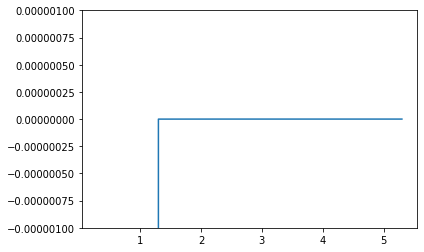

In [56]:
plt.plot(p,np.array(u) - pi/2)
plt.ylim(-1e-6, +1e-6)

In [57]:
x = []

In [58]:
x.append(simpson_for_points(func,-1, 1, 1))

In [59]:
x.append(simpson_for_points(func,-1, 1, 2))

In [60]:
x.append(simpson_for_points(func,-1, 1, 3))

In [61]:
x.append(simpson_for_points(func,-1, 1, 4))

In [62]:
x.append(simpson_for_points(func,-1, 1, 5))

In [63]:
x.append(simpson_for_points(func,-1, 1, 6))

In [64]:
x.append(simpson_for_points(func,-1, 1, 7))

In [65]:
x.append(simpson_for_points(func,-1, 1, 8))

In [66]:
x.append(simpson_for_points(func,-1, 1, 9))

In [67]:
x.append(simpson_for_points(func,-1, 1, 10))

In [68]:
x.append(simpson_for_points(func,-1, 1, 11))

In [69]:
x.append(simpson_for_points(func,-1, 1, 12))

In [70]:
t = [1,2,3,4,5,6,7,8,9,10,11,12]

(-1e-06, 1e-06)

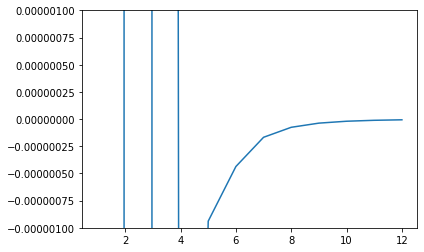

In [71]:
plt.plot(t,np.array(x) - pi/2)
plt.ylim(-1e-6, +1e-6)